In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loan_df = pd.read_csv(r'C:\Users\Teng Li Yuan\DS Assessment\data\data\loan.csv')
pay_df = pd.read_csv(r'C:\Users\Teng Li Yuan\DS Assessment\data\data\payment.csv')
cuv_df = pd.read_csv(r'C:\Users\Teng Li Yuan\DS Assessment\data\data\clarity_underwriting_variables.csv')
loan_cuv_df = pd.read_csv(r'loan_cuv_df.csv')

In [6]:
loan_df.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577658.000000,577682.000000,575432.000000,577682.000000,577682.000000,577682.000000
mean,553.080972,0.037887,0.067480,514.245084,1428.897209,7.854389,0.619187
std,110.046159,0.333366,0.250852,320.939929,925.009141,12.853451,0.485587
min,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,350.000000,1023.640000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,500.000000,1245.250000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,21.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


In [10]:
# No. of applicants

len(loan_df['anon_ssn'].unique())

459393

In [11]:
## Approved rate:
a = (loan_df['approved'] == True).sum() / loan_df['approved'].count()* 100 
print(f"The approval rate is {a:.2f} %")

The approval rate is 6.93 %


In [36]:
good_loan = ['Paid Off Loan', 'New Loan', 'Returned Item', 'Pending Paid Off']
bad_loan = ['Internal Collection', 'External Collection',  'Charged Off Paid Off', 'Settled Bankruptcy', 'Settlement Paid Off', 'Charged Off', 'Settlement Pending Paid Off']

loan_df[loan_df['isFunded']==1]['isFunded'].count()

38982

In [37]:
loan_df[loan_df['approved']==True]['isFunded'].count()

40036

In [41]:
(38982)/40036

# This is the acceptance rate of the loan offer

0.9736736936756919

In [33]:
## Check is the lended 


loan_out = loan_cuv_df['loanAmount'].sum()
payment_received = pay_df.groupby('paymentStatus')['paymentAmount'].sum().Checked
net = loan_out-payment_received

print(f'Loan out is {loan_out:.2f}, received payment is {payment_received:.2f}')
print(f'Nett is {net:.2f}')

Loan out is 24937863.00, received payment is 24206405.83
Nett is 731457.17


In [87]:
loan_cuv_df.groupby(['nPaidOff','Loan type']).count()

Unnamed: 0  loanId  anon_ssn  payFrequency    apr  \
nPaidOff Loan type                                                      
0.0      Bad             15824   15824     15824         15824  15824   
         Good            14989   14989     14989         14989  14989   
1.0      Bad              1652    1652      1652          1652   1652   
         Good             3340    3340      3340          3340   3340   
2.0      Bad               390     390       390           390    390   
         Good             1405    1405      1405          1405   1405   
3.0      Bad               120     120       120           120    120   
         Good              553     553       553           553    553   
4.0      Bad                48      48        48            48     48   
         Good              269     269       269           269    269   
5.0      Bad                24      24        24            24     24   
         Good              123     123       123           123    123   
6.0      Bad                10      10        10            10     10   
         Good               79      79        79            79     79   
7.0      Bad                 5       5         5             5      5   
         Good               41      41        41            41     41   
8.0      Bad                 3       3         3             3      3   
         Good               21      21        21            21     21   
9.0      Good               13      13        13            13     13   
10.0     Good                5       5         5             5      5   
11.0     Good               10      10        10            10     10   
12.0     Good                6       6         6             6      6   
13.0     Good                9       9         9             9      9   
14.0     Good                5       5         5             5      5   
15.0     Good                1       1         1             1      1   
16.0     Good                1       1         1             1      1   
17.0     Good                1       1         1             1      1   
18.0     Good                5       5         5             5      5   
19.0     Good                5       5         5             5      5   
20.0     Good                3       3         3             3      3   
21.0     Good                1       1         1             1      1   

                    applicationDate  originated  originatedDate  approved  \
nPaidOff Loan type                                                          
0.0      Bad                  15824       15824           15824     15824   
         Good                 14989       14989           14989     14989   
1.0      Bad                   1652        1652            1652      1652   
         Good                  3340        3340            3340      3340   
2.0      Bad                    390         390             390       390   
         Good                  1405        1405            1405      1405   
3.0      Bad                    120         120             120       120   
         Good                   553         553             553       553   
4.0      Bad                     48          48              48        48   
         Good                   269         269             269       269   
5.0      Bad                     24          24              24        24   
         Good                   123         123             123       123   
6.0      Bad                     10          10              10        10   
         Good                    79          79              79        79   
7.0      Bad                      5           5               5         5   
         Good                    41          41              41        41   
8.0      Bad                      3           3               3         3   
         Good                    21          21              21        21   
9.0      Good                    13          13              13       

In [97]:
## Getting Good loan percentage vs nPaidOff

loan_cuv_df.groupby(['nPaidOff','Loan type']).count().to_csv("Good_loan_percentage.csv")

In [106]:
gl_percentage = pd.Series([0.49, 0.67, 0.78, 0.82, 0.85, 0.84, 0.89, 0.89, 0.88, 1,1,1,1,1,1,1,1,1,1,1,1,1])*100
# Calculate in excel to save time

Text(0.5, 0, 'nPaidoff')

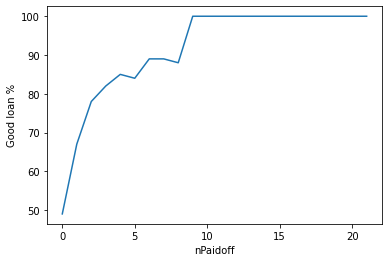

In [108]:
plt.plot(gl_percentage)
plt.ylabel('Good loan %')
plt.xlabel('nPaidoff')

In [110]:
pay_df.dtypes

loanId                object
installmentIndex       int64
isCollection            bool
paymentDate           object
principal            float64
fees                 float64
paymentAmount        float64
paymentStatus         object
paymentReturnCode     object
dtype: object

In [127]:
pay_df['Paid weekday'] = pd.to_datetime(pay_df['paymentDate']).apply(lambda x: x.weekday())

In [136]:
pay_df.groupby(['Paid weekday']).count()

## Looks like most of the ACH are scheduled on Thursday and Friday
## My motive is to investigate is there higher check rate in the payment for different day of the week
## Unlike Malaysia, 30% of the pay is paid weekly and 30% is paid biweekly, 
## so it's likely the borrower account has a higher pay on certain day
## Schedule on that day could result in a higher check rate, 
## i.e. setting repayment to the loan a higher priority and mitigate the loss profile
## This data has multiple ACH transaction for a single loan

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
Paid weekday,,,,,,,,,
0,21892,21892,21892,21892,21892,21892,21892,21892,1243
1,26854,26854,26854,26854,26854,26854,26854,26854,1656
2,50146,50146,50146,50146,50146,50146,50146,50146,2520
3,129837,129837,129837,129837,129837,129837,129837,129837,5888
4,460111,460111,460111,460111,460111,460111,460111,460111,20224
5,365,365,365,365,365,365,365,365,1
6,159,159,159,159,159,159,159,159,1
